In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/NativeCNN/Dataset'

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
image_size = (256, 256)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1031 images belonging to 7 classes.
Found 253 images belonging to 7 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,127 (13.17 MB)

 Trainable params: 3,453,127 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 398s 10s/step - accuracy: 0.1976 - loss: 1.9080 - val_accuracy: 0.4071 - val_loss: 1.6092
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 206s 6s/step - accuracy: 0.3953 - loss: 1.5002 - val_accuracy: 0.3794 - val_loss: 1.4124
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.4387 - loss: 1.3914 - val_accuracy: 0.4822 - val_loss: 1.4066
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step - accuracy: 0.5091 - loss: 1.2461 - val_accuracy: 0.5257 - val_loss: 1.1810
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.5367 - loss: 1.2069 - val_accuracy: 0.5494 - val_loss: 1.2279
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 207s 6s/step - accuracy: 0.5667 - loss: 1.0750 - val_accuracy: 0.5810 - val_loss: 1.0148
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 265s 6s/step - accuracy: 0.6752 - loss: 0.9020 - val_accuracy: 0.6364 - val_loss: 0.9730
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.6656 - loss: 0.8960 - val_accuracy: 0.6482 - val_loss: 0

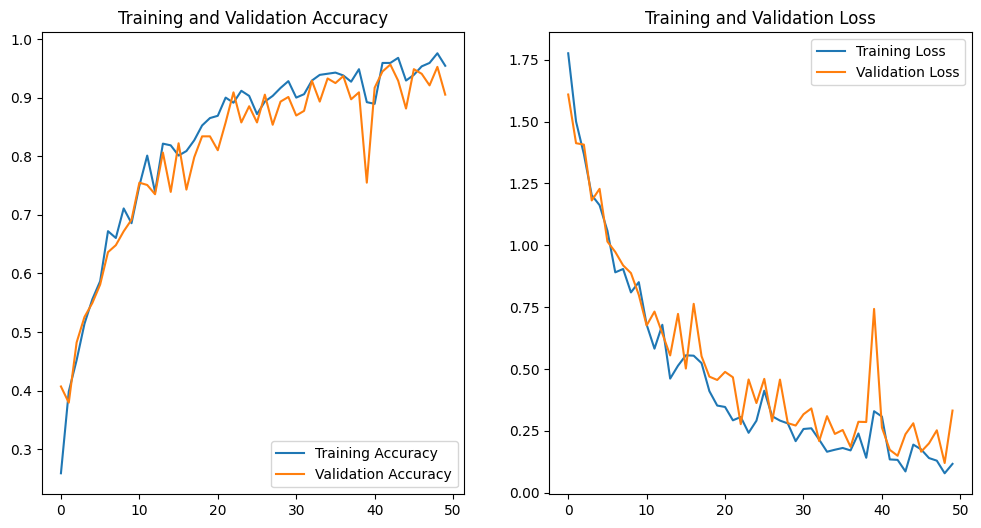

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {validation_loss}')
print(f'Validation accuracy: {validation_accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9268 - loss: 0.2347
Validation loss: 0.21234631538391113
Validation accuracy: 0.9249011874198914


In [ ]:
model.save('/content/drive/My Drive/CNN2-50.h5')

In [ ]:
import tensorflow as tf

model_path = "/content/drive/My Drive/CNN2-50.h5"

tflite_model_path = "/content/CNN2-50.tflite"

model = tf.keras.models.load_model(model_path)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpvfalf56y'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  136178763394640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178763432528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178762770464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178763439920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178763446080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178763550208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178763557424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178763555488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178763562176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178753324832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136178753329408

In [ ]:
from google.colab import files

files.download('CNN2-50.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>